# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [9]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow import keras

from keras.utils import load_img

from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU, Flatten, Dense

from keras.models import Sequential

from keras.losses import categorical_crossentropy

from keras.optimizers import Adam

from keras.utils import to_categorical

import h5py

**Let us check the version of tensorflow.**

In [5]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:


# Open the file as read only

h5f = h5py.File('/content/drive/MyDrive/Python_for_dataScience/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [6]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**  After spliting, there are 42000 images in training data and 18000 images in test data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

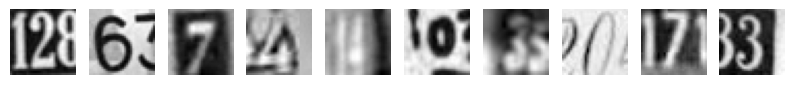

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print("----------")

print("First image:\n", X_train[0])

Shape: (32, 32)
----------
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


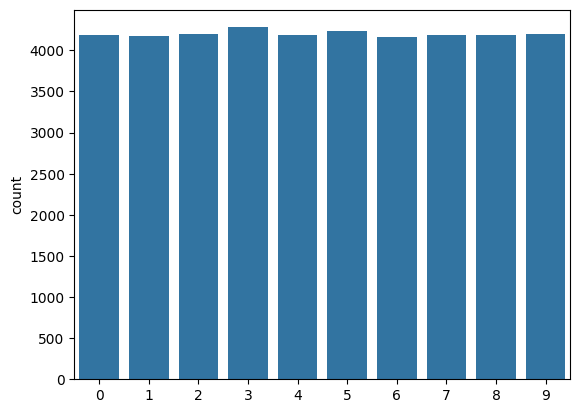

In [9]:
# Plot distribution of each category
count_plot = sns.countplot(x=y_train)

We observe that the dataset appears to be quite balanced, with each category having approximately the same number of images.

In [10]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [11]:
# Normalizing the image pixels
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [12]:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [13]:

# One-hot encode the target data
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:** Each entry is one hot encode instead of single label.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [14]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [15]:
def nn_model_1():

    model = Sequential()

    # Add the first hidden layer with 64 nodes, ReLU activation, and input shape
    model.add(Dense(64, activation='relu', input_shape=(1024,)))

    model.add(Dense(32, activation='relu'))

    # Add the output layer with 'softmax' activation and number of nodes equal to the number of classes
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [16]:
# Build the model

model_1 = nn_model_1()

In [17]:
# Print the summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model

history_model_1 = model_1.fit(X_train, y_train_one_hot,
            epochs=20,
            validation_split=0.1,
            shuffle=True,
            batch_size=128,
            verbose=2)

Epoch 1/20
296/296 - 2s - loss: 2.2655 - accuracy: 0.1383 - val_loss: 2.1653 - val_accuracy: 0.2057 - 2s/epoch - 7ms/step
Epoch 2/20
296/296 - 1s - loss: 2.0000 - accuracy: 0.2897 - val_loss: 1.8664 - val_accuracy: 0.3598 - 1s/epoch - 4ms/step
Epoch 3/20
296/296 - 1s - loss: 1.8057 - accuracy: 0.3772 - val_loss: 1.7251 - val_accuracy: 0.4212 - 1s/epoch - 4ms/step
Epoch 4/20
296/296 - 1s - loss: 1.6834 - accuracy: 0.4307 - val_loss: 1.6150 - val_accuracy: 0.4695 - 1s/epoch - 4ms/step
Epoch 5/20
296/296 - 2s - loss: 1.5835 - accuracy: 0.4715 - val_loss: 1.5208 - val_accuracy: 0.5000 - 2s/epoch - 6ms/step
Epoch 6/20
296/296 - 2s - loss: 1.4932 - accuracy: 0.5088 - val_loss: 1.4533 - val_accuracy: 0.5352 - 2s/epoch - 6ms/step
Epoch 7/20
296/296 - 1s - loss: 1.4281 - accuracy: 0.5354 - val_loss: 1.3963 - val_accuracy: 0.5486 - 1s/epoch - 4ms/step
Epoch 8/20
296/296 - 1s - loss: 1.3790 - accuracy: 0.5589 - val_loss: 1.3670 - val_accuracy: 0.5581 - 1s/epoch - 4ms/step
Epoch 9/20
296/296 - 1s 

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______

**Loss and Accuracy Trends:**

The training loss decreases, and the training accuracy increases as the number of epochs progresses. This suggests that the model is learning from the training data.
Validation Performance:

The validation loss and accuracy follow a similar trend, improving over epochs. However, there is a slight increase in validation loss around epoch 14, which may indicate a potential point of overfitting or a challenging part of the dataset.
Model Overfitting:

The model may start to overfit the training data as the number of epochs increases, as suggested by the potential divergence between training and validation performance.
Training Time:

The training time per epoch varies but generally takes a few seconds. It's essential to consider the trade-off between training time and model performance.
Validation Accuracy Plateau:

The validation accuracy seems to plateau around epoch 15, suggesting that further training may not significantly improve performance on the validation set.

**Potential Improvements:**

Consider incorporating regularization techniques such as dropout to mitigate overfitting. Additionally, fine-tune hyperparameters, adjust the model architecture, or try different optimization strategies to improve performance.
Class Imbalance:

Assess if there is a class imbalance in the dataset, as it may impact the model's ability to learn certain patterns.
Model Complexity:


**Further Evaluation:**

Evaluate the model on a separate test set to get a more unbiased assessment of its generalization performance.
Early Stopping:

Consider implementing early stopping to halt training when the model's performance on the validation set stops improving, preventing overfitting.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

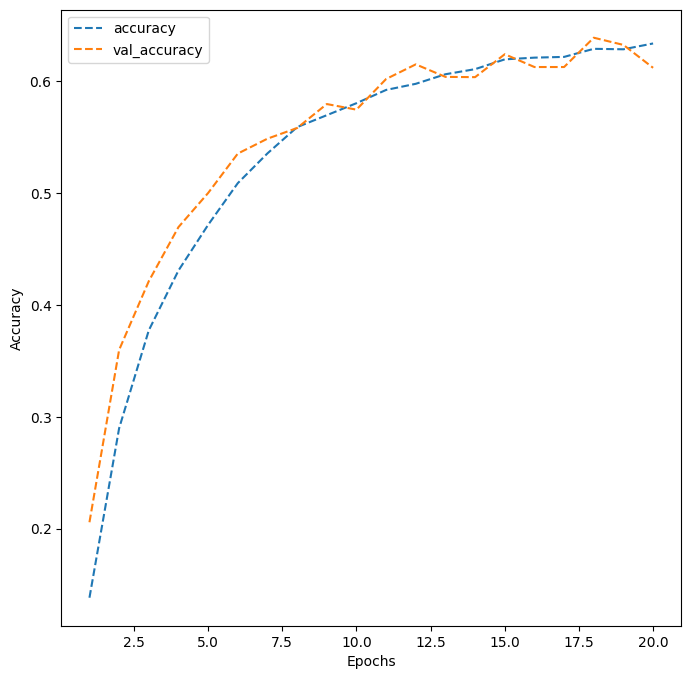

In [19]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [20]:
# Clearing backend

from keras import backend

backend.clear_session()

In [21]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [22]:
def nn_model_2():

    model = Sequential()

    # Add the first hidden layer with 64 nodes, ReLU activation, and input shape
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    model.add(Dense(128, activation='relu'))

    # Add a Dropout layer with a dropout rate of 0.2
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(BatchNormalization())

    # Add the output layer with 'softmax' activation and number of nodes equal to the number of classes
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [23]:
# Build the model

model_2 = nn_model_2()

In [24]:
# Print the summary

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [25]:
# Fit the model

history_model_2 = model_2.fit(X_train, y_train_one_hot,
            epochs=30,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 5s 16ms/step - loss: 2.3265 - accuracy: 0.1014 - val_loss: 2.3046 - val_accuracy: 0.1007
Epoch 2/30
263/263 [==============================] - 3s 11ms/step - loss: 2.2252 - accuracy: 0.1473 - val_loss: 2.1349 - val_accuracy: 0.1952
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 1.7732 - accuracy: 0.3632 - val_loss: 1.6661 - val_accuracy: 0.4623
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4262 - accuracy: 0.5169 - val_loss: 1.2803 - val_accuracy: 0.5848
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2593 - accuracy: 0.5840 - val_loss: 1.1318 - val_accuracy: 0.6371
Epoch 6/30
263/263 [==============================] - 4s 15ms/step - loss: 1.1647 - accuracy: 0.6206 - val_loss: 1.1559 - val_accuracy: 0.6236
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.1022 - accuracy: 0.6430 - val_loss: 1.0387 - val_accuracy: 0.6737

### **Plot the Training and Validation Accuracies and write down your Observations.**

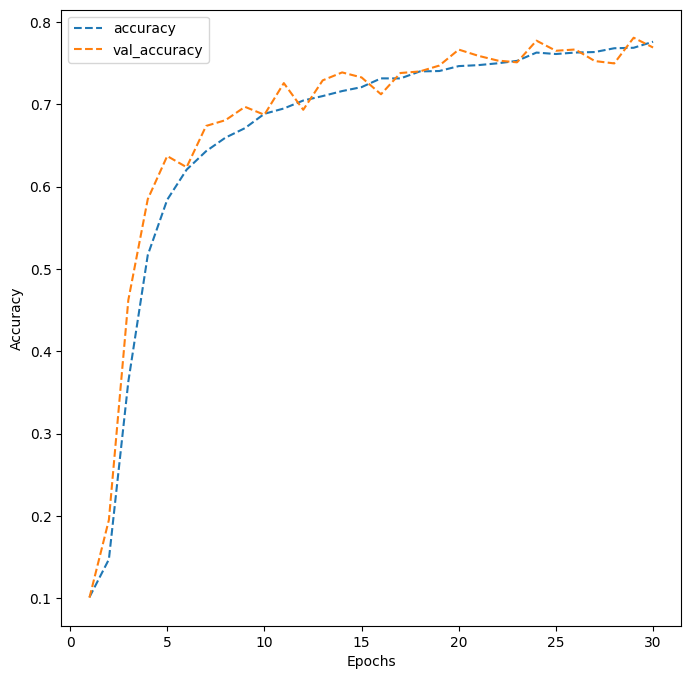

In [26]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**

**Initial Performance:**

The initial accuracy on both training and validation sets is low (around 10-15%), indicating that the model is making predictions close to random at the beginning.
Improvement Over Epochs:

As the number of epochs progresses, there is a notable improvement in both training and validation accuracy. The model is learning from the data and adjusting its weights to make better predictions.
Training Loss and Accuracy:

The training loss decreases, and training accuracy increases with each epoch. This indicates that the model is successfully minimizing the loss on the training set and improving its ability to correctly classify examples from the training data.
Validation Performance:

The validation accuracy also improves over epochs, reaching around 76-78% accuracy by the end of training. This suggests that the model is generalizing well to the unseen validation data.
Potential Overfitting:

There is a small gap between the training and validation accuracies, which may indicate a slight overfitting tendency. Monitoring this gap and implementing techniques like dropout or early stopping could help mitigate overfitting.
Training Time:

The training time per epoch is relatively short, which is beneficial for faster model development and experimentation.
Sudden Increase in Validation Loss:

There is a spike in validation loss around epoch 24, which might be an indication of the model struggling to generalize well on certain examples. This could be addressed through further analysis of the validation set or model adjustments.
Model Convergence:

The model seems to be converging to a certain level of performance, and additional epochs may not significantly improve accuracy. Consider stopping training or implementing early stopping to avoid unnecessary computation.

**Hyperparameter Tuning:**

Depending on the results and available resources, you may explore hyperparameter tuning to find the optimal learning rate, batch size, or other parameters that could further enhance model performance.
Evaluation on Test Set:

After training, it's essential to evaluate the model on a separate test set to assess its performance on unseen data and ensure generalization.

Overall, the model is making progress, but further refinement, tuning, and analysis may be beneficial for achieving better performance.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [27]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [28]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1814
           1       0.79      0.76      0.78      1828
           2       0.74      0.82      0.78      1803
           3       0.71      0.73      0.72      1719
           4       0.80      0.84      0.82      1812
           5       0.72      0.75      0.73      1768
           6       0.77      0.78      0.78      1832
           7       0.82      0.77      0.79      1808
           8       0.68      0.75      0.72      1812
           9       0.81      0.71      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



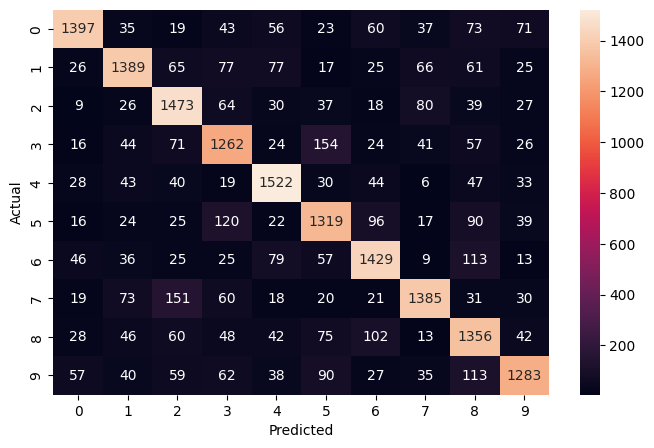

In [29]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = tf.math.confusion_matrix(y_test,test_pred)    #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**

**Class-specific Performance:**

**Precision:** Represents the accuracy of the positive predictions for each class. High precision values (close to 1) indicate that the model has fewer false positives.

**Recall:** Indicates the ability of the model to capture all the true positive instances of each class. High recall values (close to 1) suggest that the model is effectively identifying positive instances.

**F1-score:** Harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.

**Class-wise Analysis:**

Class 0, 4, 7, and 9 have relatively high precision, recall, and F1-score, suggesting good performance on these classes.
Class 2, 6, and 8 have balanced precision and recall values.
Class 3 and 5 have slightly lower precision and recall, indicating some difficulty in correctly classifying instances of these classes.
Macro and Weighted Averages:

**Macro Avg:** The unweighted average of precision, recall, and F1-score across all classes. It treats all classes equally.
Weighted Avg: Takes into account the imbalance in class sizes. Classes with more instances have a greater impact on the average.
Overall Accuracy:

The overall accuracy of the model is approximately 77%. It represents the proportion of correctly classified instances over all classes.
General Observations:

The model performs well on certain classes (0, 4, 7, 9) and less optimally on others (3, 5).
Consider further analysis, such as examining misclassified instances or exploring feature importance, to gain insights into potential improvements.
Class Imbalance:

Check for class imbalances, as it can influence performance metrics. Classes with more instances may dominate the overall performance.
Model Evaluation:

While precision, recall, and F1-score provide valuable insights, consider the specific requirements of your application to determine the most relevant metric for model evaluation.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [19]:
# Open the file as read only

h5f = h5py.File('/content/drive/MyDrive/Python_for_dataScience/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [20]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

There are 42,000 images in the training data set and 18,000 images in the testing data set.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [21]:
print("Shape:\n",X_train[0].shape)

print("First image:\n", X_train[0])

Shape:
 (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [22]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [23]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [24]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [25]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**

Each entry of the target variable is a one-hot encoded vector instead of a single label.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [37]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [38]:
# Define the model

def cnn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    # First Convolutional layer
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model


In [39]:
# Build the model

cnn_model_1 = cnn_model_1()

In [40]:
# Print the model summary

cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies and Write your observations.**

In [41]:
# Fit the model

history_cnn_model_1 = cnn_model_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 126s 120ms/step - loss: 1.1104 - accuracy: 0.6407 - val_loss: 0.6538 - val_accuracy: 0.8092
Epoch 2/20
1050/1050 [==============================] - 88s 84ms/step - loss: 0.5391 - accuracy: 0.8455 - val_loss: 0.5249 - val_accuracy: 0.8460
Epoch 3/20
1050/1050 [==============================] - 88s 84ms/step - loss: 0.4407 - accuracy: 0.8688 - val_loss: 0.4947 - val_accuracy: 0.8617
Epoch 4/20
1050/1050 [==============================] - 93s 89ms/step - loss: 0.3782 - accuracy: 0.8885 - val_loss: 0.4393 - val_accuracy: 0.8782
Epoch 5/20
1050/1050 [==============================] - 87s 83ms/step - loss: 0.3322 - accuracy: 0.9004 - val_loss: 0.4515 - val_accuracy: 0.8745
Epoch 6/20
1050/1050 [==============================] - 87s 83ms/step - loss: 0.2925 - accuracy: 0.9112 - val_loss: 0.4731 - val_accuracy: 0.8692
Epoch 7/20
1050/1050 [==============================] - 88s 83ms/step - loss: 0.2630 - accuracy: 0.9199 - val_loss: 0.4649

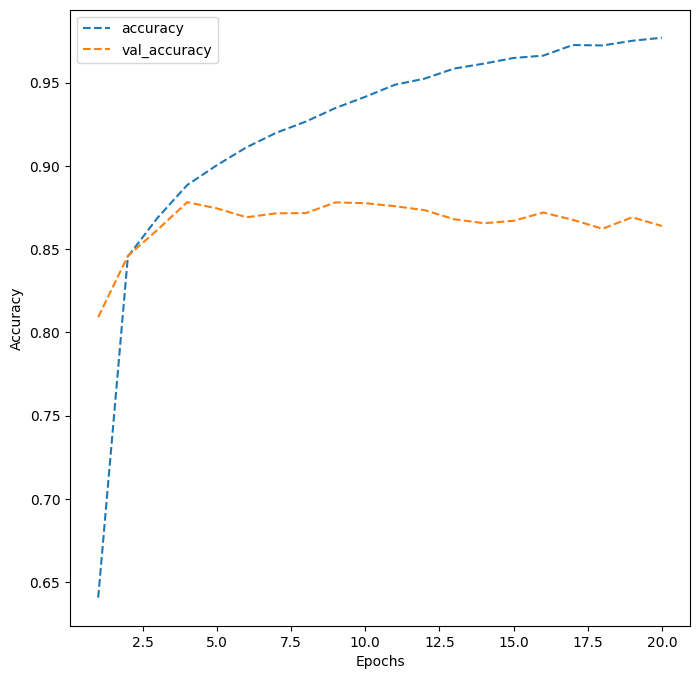

In [42]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:__________**


**Training Accuracy:** The training accuracy increases significantly over epochs, reaching a high of 97.7% by the 20th epoch. This suggests that the model is learning well from the training data.

**Validation Accuracy:** The validation accuracy also improves but starts to plateau around 86-87% after a certain point. This could indicate that the model might be overfitting or that further improvement is challenging.

**Training Loss:** The training loss decreases consistently, indicating that the model is effectively minimizing the loss on the training set.

**Validation Loss:** The validation loss initially decreases but starts to increase slightly after some epochs. This behavior could be a sign of overfitting, where the model becomes too specific to the training data.

**Accuracy Discrepancy:** There is a notable difference between training and validation accuracy, suggesting that the model might be overfitting. Regularization techniques or adjusting the model architecture could be explored to address this.

**Epoch Time:** The time per epoch increases over time, likely due to the increasing complexity of the model and the dataset size.

In summary, while the model performs well on the training set, attention should be paid to preventing overfitting, and further optimization might be explored to improve validation accuracy.






Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [26]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [11]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [27]:
def cnn_model_2():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model


In [28]:
# Build the model

cnn_model_2 = cnn_model_2()

In [29]:
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [30]:

# Fit the model
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=30,
                    verbose=1)

# Store the model building history
model_history = history_cnn_model_2.history

Epoch 1/30
263/263 [==============================] - 153s 577ms/step - loss: 1.4026 - accuracy: 0.5232 - val_loss: 1.9002 - val_accuracy: 0.4649
Epoch 2/30
263/263 [==============================] - 146s 556ms/step - loss: 0.6743 - accuracy: 0.7939 - val_loss: 0.6427 - val_accuracy: 0.8110
Epoch 3/30
263/263 [==============================] - 150s 570ms/step - loss: 0.5440 - accuracy: 0.8352 - val_loss: 0.4416 - val_accuracy: 0.8723
Epoch 4/30
263/263 [==============================] - 155s 591ms/step - loss: 0.4931 - accuracy: 0.8492 - val_loss: 0.4524 - val_accuracy: 0.8671
Epoch 5/30
263/263 [==============================] - 148s 565ms/step - loss: 0.4391 - accuracy: 0.8679 - val_loss: 0.3852 - val_accuracy: 0.8894
Epoch 6/30
263/263 [==============================] - 149s 567ms/step - loss: 0.4086 - accuracy: 0.8753 - val_loss: 0.3845 - val_accuracy: 0.8901
Epoch 7/30
263/263 [==============================] - 148s 562ms/step - loss: 0.3786 - accuracy: 0.8856 - val_loss: 0.4205 -

### **Plot the Training and Validation accuracies and write your observations.**

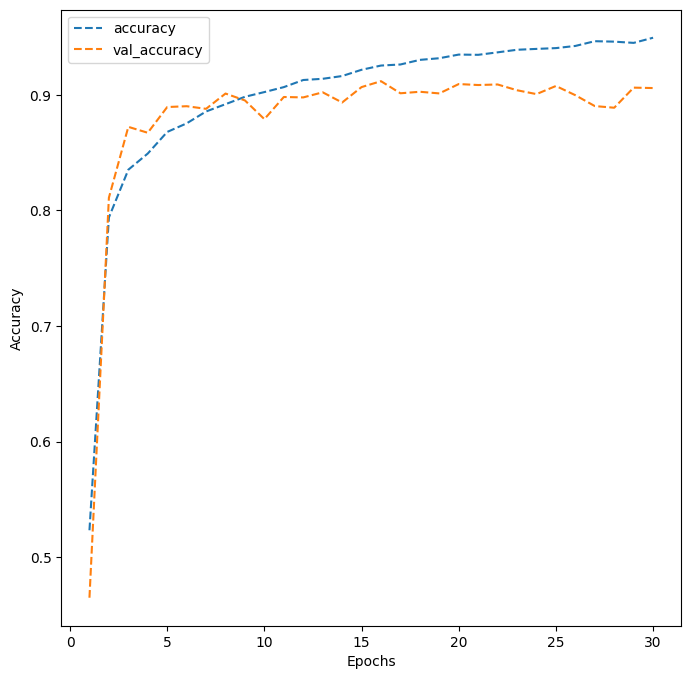

In [31]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**

Loss and Accuracy Trends:

Both training and validation loss decrease over epochs, indicating that the model is learning and improving its predictions.
Training and validation accuracy increases over epochs, suggesting that the model is getting better at classifying the data correctly.
Overfitting:

Initially, the training accuracy is lower than the validation accuracy, indicating that the model is underfitting.
As training progresses, the training accuracy surpasses the validation accuracy, which could indicate overfitting. However, the performance on the validation set remains relatively stable, suggesting that overfitting might not be severe.
Training Stability:

The training and validation loss both decrease steadily over epochs without significant fluctuations, indicating a stable training process.
Similarly, the accuracy curves show consistent improvement without sudden jumps or drops, indicating a smooth learning process.
Convergence:

The model seems to be converging well, as indicated by the diminishing returns in improvement after a certain number of epochs.
The validation accuracy plateaus after around 20 epochs, suggesting that further training might not lead to significant improvements.
Final Performance:

At the end of training, the model achieves a high validation accuracy of approximately 90.6%, indicating that it can generalize well to unseen data.
The final training accuracy is higher, around 94.9%, suggesting that the model might still have some capacity to learn from the training data.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [32]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 21s 36ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [33]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1814
           1       0.90      0.91      0.91      1828
           2       0.90      0.92      0.91      1803
           3       0.88      0.89      0.89      1719
           4       0.93      0.93      0.93      1812
           5       0.92      0.90      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.93      0.92      0.93      1808
           8       0.88      0.90      0.89      1812
           9       0.91      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



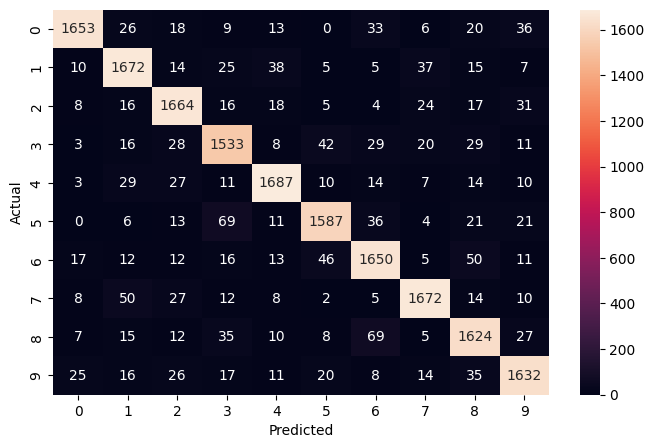

In [34]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**

**Precision, Recall, and F1-Score:**

Overall, the model achieves high precision, recall, and F1-score across all classes, with values ranging from 0.88 to 0.95.
Class 0 has the lowest precision, recall, and F1-score, indicating that it might be the most challenging class for the model to classify accurately.
Classes 1, 4, and 7 exhibit high precision, recall, and F1-scores, suggesting that the model performs exceptionally well in identifying these classes.
Accuracy:

The overall accuracy of the model is 91%, indicating that it correctly predicts the class labels for 91% of the instances in the test set.
This high accuracy demonstrates the effectiveness of the model in making correct predictions across all classes.
Weighted Average vs. Macro Average:

The weighted average metrics consider class imbalances by weighting each class's contribution based on its support (the number of instances).
The macro average computes the metric independently for each class and then takes the average, giving equal weight to each class regardless of its support.
In this case, both weighted average and macro average metrics are equal, indicating that the dataset is balanced, and each class contributes equally to the overall performance.
Model Generalization:

The high precision, recall, and F1-scores, along with the accuracy, suggest that the model generalizes well to unseen data.
The consistent performance across all classes indicates that the model can effectively discriminate between different categories.

In summary, the model demonstrates strong performance metrics, indicating its effectiveness in accurately classifying instances across all classes. However, further analysis, such as investigating misclassified instances or exploring additional evaluation metrics, could provide deeper insights into the model's behavior and potential areas for improvement.





